<a href="https://colab.research.google.com/github/talhaanwarch/OffenseEval2020/blob/master/English/distillBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ktrain

In [2]:
!pip install "tensorflow_gpu>=2.0.0"

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
# import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.models import Sequential,Model
# from tensorflow.keras.layers import Embedding,Dense,Dropout,Flatten, Input
# from tensorflow.keras.optimizers import RMSprop,Adam,Adadelta

# Load data

In [3]:
train=pd.read_csv( '/content/drive/My Drive/dataset/OLID/data/olid-training-v1.0.tsv',sep="\t")
train.head()

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


In [4]:
val=pd.read_csv('/content/drive/My Drive/dataset/OLID/data/testset-levela.tsv',sep="\t")
val_labels=pd.read_csv('/content/drive/My Drive/dataset/OLID/data/labels-levela.csv',sep=",",header=None)
val_labels.columns=['idx','subtask_a']
#val_labels.head()
val=pd.concat([val,val_labels],axis=1)
val.head()

,id,tweet,idx,subtask_a
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,15923,OFF
1,27014,"#ConstitutionDay is revered by Conservatives, ...",27014,NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,30530,NOT
3,13876,#Watching #Boomer getting the news that she is...,13876,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,60133,OFF


In [0]:
train_labels=train['subtask_a']
train=train['tweet']


val_labels=val['subtask_a']
val=val['tweet']


In [0]:
train=pd.concat([train,val])
labels=pd.concat([train_labels,val_labels])

In [7]:
test=pd.read_csv( '/content/drive/My Drive/dataset/OffenseEval2020/data/English/test_a_tweets.tsv',sep="\t")
test.head()

,id,tweet
0,A0,¿Who the fuck is Yoru?
1,A1,@USER @USER He's an evil law breaker that shou...
2,A2,Now hiring for 49 #Labor job opportunities in ...
3,A3,"#NerkondaPaarvai' - As Of Now, There Is NO Ear..."
4,A4,"@USER Hahahaha I wish...but a week is good, I’..."


In [8]:

train=train.str.replace('\d+', '')
train=train.str.replace('@USER', "") 
train=train.str.replace('URL', '')
train= train.str.lower()
#train = train.str.replace('[^\w\s]','')
#train = train.apply(lambda x : [lemmatizer.lemmatize(y) for y in w_tokenizer.tokenize(x)])
#train = train.apply(lambda x: [item for item in x if item not in stop])
#train = train.apply(lambda x : " ".join(x))
train.head()

0     she should ask a few native americans what th...
1          go home you’re drunk!!!  #maga #trump 👊🇺🇸👊 
2    amazon is investigating chinese employees who ...
3     someone should'vetaken" this piece of shit to...
4      obama wanted liberals &amp; illegals to move...
Name: tweet, dtype: object

In [9]:

test['tweet']=test['tweet'].str.replace('\d+', '')
test['tweet']=test['tweet'].str.replace('@USER', "") 
test['tweet']=test['tweet'].str.replace('URL', '')
test["tweet"]= test["tweet"].str.lower()
# test["tweet"] = test["tweet"].str.replace('[^\w\s]','')
# test["tweet"] = test["tweet"].apply(lambda x : [lemmatizer.lemmatize(y) for y in w_tokenizer.tokenize(x)])
# test["tweet"] = test["tweet"].apply(lambda x: [item for item in x if item not in stop])
# test["tweet"] = test["tweet"].apply(lambda x : " ".join(x))
test.head()

,id,tweet
0,A0,¿who the fuck is yoru?
1,A1,he's an evil law breaker that should be in p...
2,A2,now hiring for #labor job opportunities in #m...
3,A3,"#nerkondapaarvai' - as of now, there is no ear..."
4,A4,"hahahaha i wish...but a week is good, i’m ext..."


#Label Encoding

In [0]:
test=test['tweet']


In [11]:
train.head()

0     she should ask a few native americans what th...
1          go home you’re drunk!!!  #maga #trump 👊🇺🇸👊 
2    amazon is investigating chinese employees who ...
3     someone should'vetaken" this piece of shit to...
4      obama wanted liberals &amp; illegals to move...
Name: tweet, dtype: object

In [12]:
le=LabelEncoder()
labels=le.fit_transform(labels)
print(len(labels))

14100


In [0]:
train_bert=train.copy()
test_bert=test.copy()

#BERT

In [14]:
labels[0]

1

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train_bert,labels,test_size=0.2,stratify=labels,shuffle=True,random_state=2020)

In [16]:
import ktrain
from ktrain import text
MODEL_NAME = 'distilbert-base-uncased'
t = text.Transformer(MODEL_NAME, maxlen=100,classes=[0,1])
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_val, y_val)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

using Keras version: 2.2.4-tf
preprocessing train...
language: en
train sequence lengths:
	mean : 20
	95percentile : 47
	99percentile : 53


preprocessing test...
language: en
test sequence lengths:
	mean : 20
	95percentile : 48
	99percentile : 53


simulating training for different learning rates... this may take a few moments...
Train for 1880 steps
Epoch 1/2
1880/1880 [==============================] - 163s 87ms/step - loss: 0.5946 - accuracy: 0.6657
Epoch 2/2
1047/1880 [===============>..............] - ETA: 1:10 - loss: 0.8984 - accuracy: 0.6719

done.


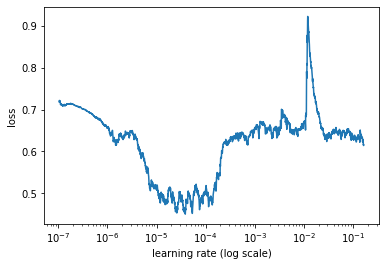

In [68]:
# learner.lr_find(show_plot=True, max_epochs=2)

In [0]:
learner.fit_onecycle(10e-4, 10)
#learner.autofit(10e-4, 10)




begin training using onecycle policy with max lr of 0.001...
Train for 1880 steps, validate for 470 steps
Epoch 1/10
1311/1880 [===================>..........] - ETA: 51s - loss: 0.6064 - accuracy: 0.6932

In [52]:
from sklearn.metrics import f1_score
predictor = ktrain.get_predictor(learner.model, preproc=t)
y_pred=predictor.predict(x_test)

#y_pred = learner.model.predict(x_test, verbose=0)
f1_score = f1_score(y_test, y_pred,average='macro')

NameError: ignored

In [54]:
y_pred[0]

'OFF'

ValueError: ignored

In [0]:
learner.autofit(5e-3, 1)
